<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/Sammy%20Lee%20-%20LS_DS1_231_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

In [1]:
!pip install kaggle

In [2]:
# Note - you'll also have to sign up for Kaggle and authorize the API
# https://github.com/Kaggle/kaggle-api#api-credentials

# This essentially means uploading a kaggle.json file
# For Colab we can have it in Google Drive
from google.colab import drive
drive.mount('/content/drive')
%env KAGGLE_CONFIG_DIR=/content/drive/My Drive/

# You also have to join the Titanic competition to have access to the data
!kaggle competitions download -c titanic

KeyboardInterrupt: ignored

In [5]:
# How would we try to do this with linear regression?
import pandas as pd

train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()  # Unlabeled, for Kaggle submission

train_df.head()

FileNotFoundError: ignored

In [4]:
train_df.describe()

NameError: ignored

In [0]:
from sklearn.linear_model import LinearRegression

X = train_df[['Pclass', 'Age', 'Fare']]
y = train_df.Survived

linear_reg = LinearRegression().fit(X, y)
linear_reg.score(X, y)

In [0]:
linear_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

In [0]:
linear_reg.coef_

In [0]:
import numpy as np

test_case = np.array([[1, 5, 500]])  # Rich 5-year old in first class
linear_reg.predict(test_case)

In [0]:
np.dot(linear_reg.coef_, test_case.reshape(-1, 1)) + linear_reg.intercept_

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

In [0]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

In [0]:
log_reg.predict(test_case)[0]

In [0]:
help(log_reg.predict)

In [0]:
log_reg.predict_proba(test_case)[0]

In [0]:
# What's the math?
log_reg.coef_

In [0]:
log_reg.intercept_

In [0]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [0]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

So, clearly a more appropriate model in this situation! For more on the math, [see this Wikipedia example](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

For live - let's tackle [another classification dataset on absenteeism](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) - it has 21 classes, but remember, scikit-learn LogisticRegression automatically handles more than two classes. How? By essentially treating each label as different (1) from some base class (0).

In [0]:
# Live - let's try absenteeism!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
!unzip Absenteeism_at_work_AAA.zip	

In [0]:
!head Absenteeism_at_work.csv

In [0]:
import pandas as pd

absent_df = pd.read_table('Absenteeism_at_work.csv', sep=';')
absent_df.head()

In [0]:
absent_df.shape

In [0]:
from sklearn.linear_model import LogisticRegression



In [0]:
absent_df.columns

In [0]:
X = absent_df.drop('Reason for absence', axis='columns')
y = absent_df['Reason for absence']

absent_log1 = LogisticRegression().fit(X, y)
absent_log1.score(X, y)

In [0]:
absent_log1

In [0]:
absent_log1.coef_

In [0]:
len(absent_log1.coef_)

In [0]:
?LogisticRegression

In [0]:
y_pred = absent_log1.predict(X)

y_pred[:10]

In [0]:
import numpy as np

print(np.max(y_pred))
print(np.min(y_pred))

## Assignment - real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

In [4]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-01-20 21:13:23--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip.1’

fma_metadata.zip.1  100%[===================>] 341.81M  18.4MB/s    in 20s     

2019-01-20 21:13:43 (17.4 MB/s) - ‘fma_metadata.zip.1’ saved [358412441/358412441]

Archive:  fma_metadata.zip
replace fma_metadata/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
tracks = pd.read_csv('fma_metadata/tracks.csv', skiprows=[0])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
tracks.describe()

,comments,favorites,id,listens,tracks,comments.1,favorites.1,id.1,latitude,longitude,bit_rate,comments.2,duration,favorites.2,interest,listens.1,number
count,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,0.394946,1.286927,12826.933914,3.212031e+04,19.721452,1.894702,30.041915,12036.770404,39.901626,-38.668642,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,2.268915,3.133035,6290.261805,1.478532e+05,39.943673,6.297679,100.511408,6881.420867,18.240860,65.237220,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.000000,-45.878760,-157.526855,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,7793.000000,3.361000e+03,7.000000,0.000000,1.000000,6443.000000,39.271398,-79.997459,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,0.000000,0.000000,13374.000000,8.982000e+03,11.000000,0.000000,5.000000,12029.500000,41.387917,-73.554431,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,0.000000,1.000000,18203.000000,2.363500e+04,17.000000,1.000000,16.000000,18011.000000,48.856930,4.351710,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,53.000000,61.000000,22940.000000,3.564243e+06,652.000000,79.000000,963.000000,24357.000000,67.286005,175.277000,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [7]:
pd.set_option('display.max_columns', None)  # Unlimited columns
tracks.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
0,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,Hip-Hop,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway


In [8]:
tracks.drop(0, inplace=True)
tracks.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,Hip-Hop,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,[],Niris,13.0,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,2008-11-26 01:42:52,10.0,4.0,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000.0,0.0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311.0,0.0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level


In [9]:
tracks.columns

Index(['Unnamed: 0', 'comments', 'date_created', 'date_released', 'engineer',
       'favorites', 'id', 'information', 'listens', 'producer', 'tags',
       'title', 'tracks', 'type', 'active_year_begin', 'active_year_end',
       'associated_labels', 'bio', 'comments.1', 'date_created.1',
       'favorites.1', 'id.1', 'latitude', 'location', 'longitude', 'members',
       'name', 'related_projects', 'tags.1', 'website', 'wikipedia_page',
       'split', 'subset', 'bit_rate', 'comments.2', 'composer',
       'date_created.2', 'date_recorded', 'duration', 'favorites.2',
       'genre_top', 'genres', 'genres_all', 'information.1', 'interest',
       'language_code', 'license', 'listens.1', 'lyricist', 'number',
       'publisher', 'tags.2', 'title.1'],
      dtype='object')

In [0]:
tracks.rename({'Unnamed: 0': 'track_id'}, axis=1, inplace=True)


In [11]:
tracks.head()

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,Hip-Hop,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,[],Niris,13.0,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,2008-11-26 01:42:52,10.0,4.0,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000.0,0.0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311.0,0.0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level


In [12]:
tracks.shape

(106574, 53)

In [13]:
tracks.isna().sum()

track_id                  0
comments                  0
date_created           3529
date_released         36280
engineer              91279
favorites                 0
id                        0
information           23425
listens                   0
producer              88514
tags                      0
title                  1025
tracks                    0
type                   6508
active_year_begin     83863
active_year_end      101199
associated_labels     92303
bio                   35418
comments.1                0
date_created.1          856
favorites.1               0
id.1                      0
latitude              62030
location              36364
longitude             62030
members               59725
name                      0
related_projects      93422
tags.1                    0
website               27318
wikipedia_page       100993
split                     0
subset                    0
bit_rate                  0
comments.2                0
composer            

In [14]:
tracks['split'].value_counts()

training      84353
test          11263
validation    10958
Name: split, dtype: int64

In [15]:
tracks['genre_top'].value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [16]:
tracks['type'].value_counts()

Album               87549
Radio Program        6551
Live Performance     5035
Single Tracks         917
Contest                14
Name: type, dtype: int64

In [17]:
tracks['title'].value_counts()

microSong Entries                                              310
Sectioned v4.0                                                 200
Live at the 2014 Golden Festival                               168
INTO INFINITY: an exploration of on and on and on and on...    151
Necktar Volume 6                                               150
Entries                                                        139
The Conet Project                                              138
Classwar Karaoke - 0025 Survey                                 135
Necktar Volume 7                                               128
Necktar Volume 8                                               117
Necktar Volume 5                                               115
Sincerity Is The Key                                           112
Necktar Volume 3                                               111
Necktar Volume 9.1                                             110
Classwar Karaoke - 0021 Survey                                

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [19]:
tracks['bio'].tail(50)

106525    <p>Julie Marie Byrne is a native of New York S...
106526    <p>Julie Marie Byrne is a native of New York S...
106527    <p>Julie Marie Byrne is a native of New York S...
106528                                                  NaN
106529                                                  NaN
106530                                                  NaN
106531                                                  NaN
106532                                                  NaN
106533                                                  NaN
106534                                                  NaN
106535                                                  NaN
106536                                                  NaN
106537                                                  NaN
106538                                                  NaN
106539                                                  NaN
106540                                                  NaN
106541                                  

In [20]:
tracks.columns

Index(['track_id', 'comments', 'date_created', 'date_released', 'engineer', 'favorites', 'id', 'information', 'listens', 'producer', 'tags', 'title', 'tracks', 'type', 'active_year_begin', 'active_year_end', 'associated_labels', 'bio', 'comments.1', 'date_created.1', 'favorites.1', 'id.1', 'latitude', 'location', 'longitude', 'members', 'name', 'related_projects', 'tags.1', 'website', 'wikipedia_page', 'split', 'subset', 'bit_rate', 'comments.2', 'composer', 'date_created.2', 'date_recorded', 'duration', 'favorites.2', 'genre_top', 'genres', 'genres_all', 'information.1', 'interest', 'language_code', 'license', 'listens.1', 'lyricist', 'number', 'publisher', 'tags.2', 'title.1'], dtype='object')

In [21]:
tracks_truncated = tracks.drop(['date_created', 'date_released', 'engineer', 'producer',
                               'active_year_begin', 'active_year_end', 'associated_labels',
                               'date_created.1', 'latitude', 'longitude', 'location',
                               'related_projects', 'website', 'wikipedia_page', 'composer',
                               'date_recorded', 'information.1', 'language_code', 'lyricist',
                               'publisher'], axis=1)

tracks_truncated.head()

,track_id,comments,favorites,id,information,listens,tags,title,tracks,type,bio,comments.1,favorites.1,id.1,members,name,tags.1,split,subset,bit_rate,comments.2,date_created.2,duration,favorites.2,genre_top,genres,genres_all,interest,license,listens.1,number,tags.2,title.1
1,2,0.0,4.0,1.0,<p></p>,6073.0,[],AWOL - A Way Of Life,7.0,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,9.0,1.0,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:12,168.0,2.0,Hip-Hop,[21],[21],4656.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,3.0,[],Food
2,3,0.0,4.0,1.0,<p></p>,6073.0,[],AWOL - A Way Of Life,7.0,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,9.0,1.0,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,['awol'],training,medium,256000.0,0.0,2008-11-26 01:48:14,237.0,1.0,Hip-Hop,[21],[21],1470.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,4.0,[],Electric Ave
3,5,0.0,4.0,1.0,<p></p>,6073.0,[],AWOL - A Way Of Life,7.0,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,9.0,1.0,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:20,206.0,6.0,Hip-Hop,[21],[21],1933.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,6.0,[],This World
4,10,0.0,4.0,6.0,NaN,47632.0,[],Constant Hitmaker,2.0,Album,"<p><span style=""font-family:Verdana, Geneva, A...",3.0,74.0,6.0,"Kurt Vile, the Violators",Kurt Vile,"['philly', 'kurt vile']",training,small,192000.0,0.0,2008-11-25 17:49:06,161.0,178.0,Pop,[10],[10],54881.0,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,1.0,[],Freeway
5,20,0.0,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,[],Niris,13.0,Album,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,10.0,4.0,Nicky Cook\n,Nicky Cook,"['instrumentals', 'experimental pop', 'post pu...",training,large,256000.0,0.0,2008-11-26 01:48:56,311.0,0.0,NaN,"[76, 103]","[17, 10, 76, 103]",978.0,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,3.0,[],Spiritual Level


In [22]:
tracks_truncated.isna().sum()

track_id              0
comments              0
favorites             0
id                    0
information       23425
listens               0
tags                  0
title              1025
tracks                0
type               6508
bio               35418
comments.1            0
favorites.1           0
id.1                  0
members           59725
name                  0
tags.1                0
split                 0
subset                0
bit_rate              0
comments.2            0
date_created.2        0
duration              0
favorites.2           0
genre_top         56976
genres                0
genres_all            0
interest              0
license              87
listens.1             0
number                0
tags.2                0
title.1               1
dtype: int64

In [23]:
tracks_truncated = tracks_truncated.drop(['information', 'title', 'bio', 'members'], axis=1)

tracks_truncated.head()

,track_id,comments,favorites,id,listens,tags,tracks,type,comments.1,favorites.1,id.1,name,tags.1,split,subset,bit_rate,comments.2,date_created.2,duration,favorites.2,genre_top,genres,genres_all,interest,license,listens.1,number,tags.2,title.1
1,2,0.0,4.0,1.0,6073.0,[],7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:12,168.0,2.0,Hip-Hop,[21],[21],4656.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,3.0,[],Food
2,3,0.0,4.0,1.0,6073.0,[],7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,medium,256000.0,0.0,2008-11-26 01:48:14,237.0,1.0,Hip-Hop,[21],[21],1470.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,4.0,[],Electric Ave
3,5,0.0,4.0,1.0,6073.0,[],7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:20,206.0,6.0,Hip-Hop,[21],[21],1933.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,6.0,[],This World
4,10,0.0,4.0,6.0,47632.0,[],2.0,Album,3.0,74.0,6.0,Kurt Vile,"['philly', 'kurt vile']",training,small,192000.0,0.0,2008-11-25 17:49:06,161.0,178.0,Pop,[10],[10],54881.0,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,1.0,[],Freeway
5,20,0.0,2.0,4.0,2710.0,[],13.0,Album,2.0,10.0,4.0,Nicky Cook,"['instrumentals', 'experimental pop', 'post pu...",training,large,256000.0,0.0,2008-11-26 01:48:56,311.0,0.0,NaN,"[76, 103]","[17, 10, 76, 103]",978.0,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,3.0,[],Spiritual Level


In [24]:
tracks_truncated.isna().sum()

track_id              0
comments              0
favorites             0
id                    0
listens               0
tags                  0
tracks                0
type               6508
comments.1            0
favorites.1           0
id.1                  0
name                  0
tags.1                0
split                 0
subset                0
bit_rate              0
comments.2            0
date_created.2        0
duration              0
favorites.2           0
genre_top         56976
genres                0
genres_all            0
interest              0
license              87
listens.1             0
number                0
tags.2                0
title.1               1
dtype: int64

In [25]:
tracks_truncated['license'].value_counts()

Attribution-Noncommercial-Share Alike 3.0 United States                            19250
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International      17732
Attribution-NonCommercial-ShareAlike 3.0 International                             15260
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                       12133
Attribution-Noncommercial-No Derivative Works 3.0 United States                    10584
Attribution-NonCommercial-ShareAlike                                                6907
Attribution                                                                         4991
Attribution-NonCommercial 3.0 International                                         3570
Attribution-NonCommercial                                                           3409
Attribution-ShareAlike                                                              1549
Attribution-Noncommercial 3.0 United States                                         1036
Creative Commons Attr

In [26]:
tracks_truncated = tracks_truncated.drop(['license', 'tags', 'title.1'], axis=1)
tracks_truncated.isna().sum()

track_id              0
comments              0
favorites             0
id                    0
listens               0
tracks                0
type               6508
comments.1            0
favorites.1           0
id.1                  0
name                  0
tags.1                0
split                 0
subset                0
bit_rate              0
comments.2            0
date_created.2        0
duration              0
favorites.2           0
genre_top         56976
genres                0
genres_all            0
interest              0
listens.1             0
number                0
tags.2                0
dtype: int64

In [27]:
tracks_truncated['type'] = tracks_truncated['type'].fillna('Album') 
tracks_truncated.isna().sum()

track_id              0
comments              0
favorites             0
id                    0
listens               0
tracks                0
type                  0
comments.1            0
favorites.1           0
id.1                  0
name                  0
tags.1                0
split                 0
subset                0
bit_rate              0
comments.2            0
date_created.2        0
duration              0
favorites.2           0
genre_top         56976
genres                0
genres_all            0
interest              0
listens.1             0
number                0
tags.2                0
dtype: int64

In [28]:
tracks_truncated = tracks_truncated.dropna()
tracks_truncated.isna().sum()

track_id          0
comments          0
favorites         0
id                0
listens           0
tracks            0
type              0
comments.1        0
favorites.1       0
id.1              0
name              0
tags.1            0
split             0
subset            0
bit_rate          0
comments.2        0
date_created.2    0
duration          0
favorites.2       0
genre_top         0
genres            0
genres_all        0
interest          0
listens.1         0
number            0
tags.2            0
dtype: int64

In [29]:
tracks_truncated.shape

(49598, 26)

In [30]:
tracks_truncated.head()

,track_id,comments,favorites,id,listens,tracks,type,comments.1,favorites.1,id.1,name,tags.1,split,subset,bit_rate,comments.2,date_created.2,duration,favorites.2,genre_top,genres,genres_all,interest,listens.1,number,tags.2
1,2,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:12,168.0,2.0,Hip-Hop,[21],[21],4656.0,1293.0,3.0,[]
2,3,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,medium,256000.0,0.0,2008-11-26 01:48:14,237.0,1.0,Hip-Hop,[21],[21],1470.0,514.0,4.0,[]
3,5,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,small,256000.0,0.0,2008-11-26 01:48:20,206.0,6.0,Hip-Hop,[21],[21],1933.0,1151.0,6.0,[]
4,10,0.0,4.0,6.0,47632.0,2.0,Album,3.0,74.0,6.0,Kurt Vile,"['philly', 'kurt vile']",training,small,192000.0,0.0,2008-11-25 17:49:06,161.0,178.0,Pop,[10],[10],54881.0,50135.0,1.0,[]
10,134,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,1.0,AWOL,['awol'],training,medium,256000.0,0.0,2008-11-26 01:43:19,207.0,3.0,Hip-Hop,[21],[21],1126.0,943.0,5.0,[]


In [31]:
tracks_truncated = tracks_truncated.drop(['id.1', 'name', 'date_created.2', 'subset',
                                         'split', 'tags.1', 'tags.2', 'genres', 'genres_all'], axis=1)
tracks_truncated.head()

,track_id,comments,favorites,id,listens,tracks,type,comments.1,favorites.1,bit_rate,comments.2,duration,favorites.2,genre_top,interest,listens.1,number
1,2,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,256000.0,0.0,168.0,2.0,Hip-Hop,4656.0,1293.0,3.0
2,3,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,256000.0,0.0,237.0,1.0,Hip-Hop,1470.0,514.0,4.0
3,5,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,256000.0,0.0,206.0,6.0,Hip-Hop,1933.0,1151.0,6.0
4,10,0.0,4.0,6.0,47632.0,2.0,Album,3.0,74.0,192000.0,0.0,161.0,178.0,Pop,54881.0,50135.0,1.0
10,134,0.0,4.0,1.0,6073.0,7.0,Album,0.0,9.0,256000.0,0.0,207.0,3.0,Hip-Hop,1126.0,943.0,5.0


In [32]:
# pd.get_dummies(df, prefix=['A', 'D'], columns=['A', 'D'])
tracks_truncated_dummies = pd.get_dummies(tracks_truncated, columns=['type'])
tracks_truncated_dummies.head()

,track_id,comments,favorites,id,listens,tracks,comments.1,favorites.1,bit_rate,comments.2,duration,favorites.2,genre_top,interest,listens.1,number,type_Album,type_Live Performance,type_Radio Program,type_Single Tracks
1,2,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,168.0,2.0,Hip-Hop,4656.0,1293.0,3.0,1,0,0,0
2,3,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,237.0,1.0,Hip-Hop,1470.0,514.0,4.0,1,0,0,0
3,5,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,206.0,6.0,Hip-Hop,1933.0,1151.0,6.0,1,0,0,0
4,10,0.0,4.0,6.0,47632.0,2.0,3.0,74.0,192000.0,0.0,161.0,178.0,Pop,54881.0,50135.0,1.0,1,0,0,0
10,134,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,207.0,3.0,Hip-Hop,1126.0,943.0,5.0,1,0,0,0


In [33]:
tracks_truncated_dummies.dtypes

track_id                  object
comments                 float64
favorites                float64
id                       float64
listens                  float64
tracks                   float64
comments.1               float64
favorites.1              float64
bit_rate                 float64
comments.2               float64
duration                 float64
favorites.2              float64
genre_top                 object
interest                 float64
listens.1                float64
number                   float64
type_Album                 uint8
type_Live Performance      uint8
type_Radio Program         uint8
type_Single Tracks         uint8
dtype: object

In [34]:
tracks_truncated_dummies.columns

Index(['track_id', 'comments', 'favorites', 'id', 'listens', 'tracks', 'comments.1', 'favorites.1', 'bit_rate', 'comments.2', 'duration', 'favorites.2', 'genre_top', 'interest', 'listens.1', 'number', 'type_Album', 'type_Live Performance', 'type_Radio Program', 'type_Single Tracks'], dtype='object')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = tracks_truncated_dummies[['comments', 'favorites', 'id', 'listens', 'tracks',
                             'comments.1', 'favorites.1', 'bit_rate', 'comments.2',
                             'duration', 'favorites.2', 'interest', 'listens.1',
                             'number', 'type_Album', 'type_Live Performance', 'type_Radio Program',
                             'type_Single Tracks']].values
y = tracks_truncated_dummies['genre_top'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.39
Test set score: 0.38


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = tracks_truncated_dummies[['comments', 'favorites', 'id', 'listens', 'tracks',
                             'comments.1', 'favorites.1', 'bit_rate', 'comments.2',
                             'duration', 'favorites.2', 'interest', 'listens.1',
                             'number', 'type_Album', 'type_Live Performance', 'type_Radio Program',
                             'type_Single Tracks']].values
y = tracks_truncated_dummies['genre_top'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=1000).fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.43
Test set score: 0.44


In [37]:
tracks_truncated_dummies['genre_top'].value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [38]:
# Limiting the target variable by putting some categoes of genres into a 'Other' bucket

genre_top_dict = {
    
    'Pop': 'Hip-Hop',
    'Easy Listening': 'Jazz',
    'Blues': 'Jazz',
    'Soul-RnB': 'Jazz',
    'Old-Time / Historic':'Other',
    'Spoken': 'Other',
    'Folk': 'Other',
    'Instrumental': 'Classical',
    'International': 'Classical',
    'Rock': 'Rock',
    'Experimental': 'Experimental',
    'Electronic': 'Electronic',
    'Classical':'Classical',
    'Hip-Hop': 'Hip-Hop',
    'Jazz': 'Jazz',
    'Country': 'Other'
}

tracks_truncated_dummies['genre_top'] = tracks_truncated_dummies['genre_top'].map(genre_top_dict)

tracks_truncated_dummies['genre_top'].value_counts()

Rock            14182
Experimental    10608
Electronic       9372
Hip-Hop          5884
Classical        4698
Other            3974
Jazz              880
Name: genre_top, dtype: int64

In [39]:
y_pred = lr.predict(X_test_scaled)
y_pred[:5]

array(['Experimental', 'Experimental', 'Electronic', 'Rock',
       'Experimental'], dtype=object)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = tracks_truncated_dummies[['comments', 'favorites', 'id', 'listens', 'tracks',
                             'comments.1', 'favorites.1', 'bit_rate', 'comments.2',
                             'duration', 'favorites.2', 'interest', 'listens.1',
                             'number', 'type_Album', 'type_Live Performance', 'type_Radio Program',
                             'type_Single Tracks']].values
y = tracks_truncated_dummies['genre_top'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=100).fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.44
Test set score: 0.44


###  Unfortunately limiting the target variable didn't do much for the model's accuracy

In [41]:
y_pred = lr.predict(X_test_scaled)
y_pred[:5]

array(['Experimental', 'Experimental', 'Electronic', 'Rock',
       'Experimental'], dtype=object)

In [0]:
# Using Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = tracks_truncated_dummies[['comments', 'favorites', 'id', 'listens', 'tracks',
                             'comments.1', 'favorites.1', 'bit_rate', 'comments.2',
                             'duration', 'favorites.2', 'interest', 'listens.1',
                             'number', 'type_Album', 'type_Live Performance', 'type_Radio Program',
                             'type_Single Tracks']].values
y = tracks_truncated_dummies['genre_top'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(criterion='entropy', max_features=15, random_state=42).fit(X_train, y_train)

print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set score: 1.00
Test set score: 0.88


In [49]:
y_pred = rf.predict(X_test_scaled)
print(y_pred[:20])

print()

print(y_test[:20])

['Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Experimental'
 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock'
 'Other']

['Electronic' 'Electronic' 'Experimental' 'Rock' 'Rock' 'Hip-Hop' 'Rock'
 'Hip-Hop' 'Rock' 'Rock' 'Experimental' 'Rock' 'Electronic' 'Experimental'
 'Hip-Hop' 'Experimental' 'Rock' 'Classical' 'Experimental' 'Electronic']


This is the biggest data you've played with so far, and while it does generally fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  - What information isn't very useful for predicting genre?
  - What surprised you the most about your results?

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

In [54]:
X_df = tracks_truncated_dummies[['comments', 'favorites', 'id', 'listens', 'tracks',
                             'comments.1', 'favorites.1', 'bit_rate', 'comments.2',
                             'duration', 'favorites.2', 'interest', 'listens.1',
                             'number', 'type_Album', 'type_Live Performance', 'type_Radio Program',
                             'type_Single Tracks']]

X_df.head()

,comments,favorites,id,listens,tracks,comments.1,favorites.1,bit_rate,comments.2,duration,favorites.2,interest,listens.1,number,type_Album,type_Live Performance,type_Radio Program,type_Single Tracks
1,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,168.0,2.0,4656.0,1293.0,3.0,1,0,0,0
2,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,237.0,1.0,1470.0,514.0,4.0,1,0,0,0
3,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,206.0,6.0,1933.0,1151.0,6.0,1,0,0,0
4,0.0,4.0,6.0,47632.0,2.0,3.0,74.0,192000.0,0.0,161.0,178.0,54881.0,50135.0,1.0,1,0,0,0
10,0.0,4.0,1.0,6073.0,7.0,0.0,9.0,256000.0,0.0,207.0,3.0,1126.0,943.0,5.0,1,0,0,0


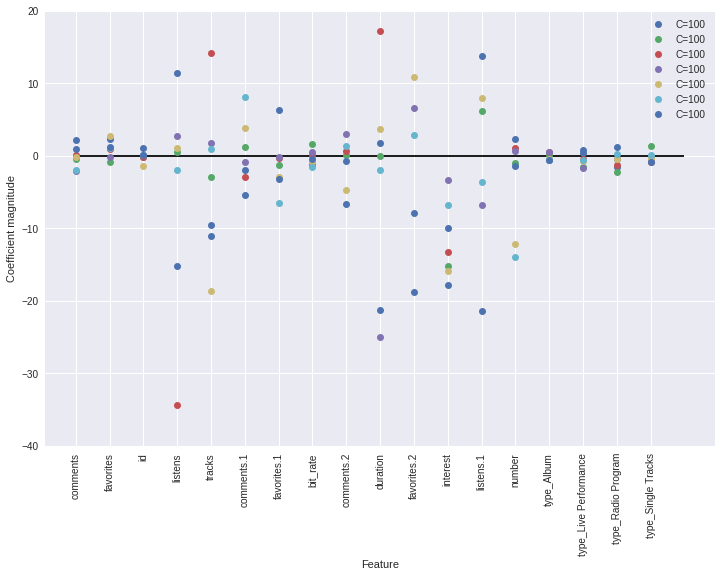

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(lr.coef_.T, 'o', label="C=100")
plt.xticks(range(X_df.shape[1]), X_df.columns, rotation=90)
plt.hlines(0, 0, X_df.shape[1])
plt.ylim(-40, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();

### Answer: Examination of the coefficients tell us that features like "listens", "tracks", "duration", and "interest" might be some of the best predictors.  The reason why I think a feature like "listens" helps is because some forms of music like Rock and Hip-Hop and Pop type of music are more popular by default and therefore will get more listens.  This is also related to the feature of "duration" as in the most populat genre of music like Rock and Hip-Hop music tend to have shorter durations than Classifical music for example.

### Answer: feaures like "id", and "type_Album" don't seem very helpful.  "Id" is just a feature that describes the order of data so it has nothing to do with "genre".  Furthermore, most music is sold in the form of "Albums", therefore there's not enough variation in that feature to give us any meaningful information in regards to "genre".

### Answer: What surprised me most about the results is how bad the results were with Logistic Regression.  This is of course due to the model I've decided to use as a result of dropping so much data to the problem of missing data.  I believe some of the object datatype features like "bio" held valuable information, but I was unable to use it because around 30% of the data for "bio" was missing.  

### Another thing I was surprised by was how good another type of workhorse classification algorithm performed: The RandomForest Classifier.  This dataset was probably one of the least promising due to the data preprocessing I undertook.  And maybe I could've worked with just the subset of the data that did have data for features like "bio", and "tag".  However, the RandomForest Classifier took the very limited dataset I gave it consisting mostly of numerical data, and managed to get an 88% accuracy rate on the test set.  

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.